In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data_pd = pd.read_csv("quadreg_data.csv",skiprows=0,names=["x","y"])
print(data_pd)

           x         y
0   0.020272  1.019713
1  -0.982887  2.054166
2  -0.827676  1.638951
3   0.596325  1.287361
4   0.289416  1.127568
5  -0.429220  1.207155
6  -0.879846  1.766583
7   0.400010  1.140985
8   0.935192  1.891297
9  -0.357462  1.122835
10  0.500480  1.327282
11 -0.717307  1.520634
12 -0.331321  1.121314
13 -0.588117  1.299677
14 -0.597805  1.358035
15 -0.034671  1.014566
16  0.235868  0.968986
17 -0.626353  1.396471
18  0.547891  1.312413
19 -0.842669  1.714989
20 -0.651469  1.441607
21  0.835475  1.677351
22  0.710989  1.464407
23  0.386467  1.101665
24 -0.346081  1.039018
25 -0.014985  1.038561
26 -0.777399  1.627514
27  0.217702  1.031296
28 -0.302979  1.115130
29  0.747832  1.558129


In [3]:
xpd = np.array(data_pd[["x"]])
ypd = np.array(data_pd[["y"]])
n = xpd.size

xbar = np.mean(xpd)
ybar = np.mean(ypd)

xpd = xpd.reshape((n,))
ypd = ypd.reshape((n,))

In [4]:
xpd

array([ 0.020272, -0.982887, -0.827676,  0.596325,  0.289416, -0.42922 ,
       -0.879846,  0.40001 ,  0.935192, -0.357462,  0.50048 , -0.717307,
       -0.331321, -0.588117, -0.597805, -0.034671,  0.235868, -0.626353,
        0.547891, -0.842669, -0.651469,  0.835475,  0.710989,  0.386467,
       -0.346081, -0.014985, -0.777399,  0.217702, -0.302979,  0.747832])

In [5]:
Sxx = np.sum(xpd**2)-n*xbar**2
Sxy = np.dot(xpd,ypd)-n*xbar*ybar
Sxx2 = np.sum(xpd**3)-xbar*np.sum(xpd**2)
Sx2y = np.sum(xpd**2*(ypd))-ybar*np.sum(xpd**2)
Sx2x2 = np.sum(xpd**4)-(np.sum(xpd**2)**2)/n

In [6]:
a = (Sx2y*Sxx-Sxy*Sxx2)/(Sxx*Sx2x2-Sxx2**2)
b = (Sxy*Sx2x2-Sx2y*Sxx2)/(Sxx*Sx2x2-Sxx2**2)
c = ybar-b*xbar-a*np.sum(xpd**2)/n

In [8]:
print('a = ', a, ',b = ', b, ',c = ', c)

a =  1.0158122820554047 ,b =  -0.010091535235750352 ,c =  0.9914053214338694


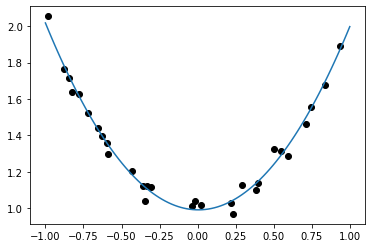

In [9]:
x = np.linspace(-1,1,100)
y = a*x**2 + b*x +c
plt.plot(x,y)
plt.scatter(xpd,ypd,color="black")
plt.show()


Evaluation

In [10]:
yhat = a*xpd**2 + b*xpd +c
RMSE = np.sqrt(np.sum((ypd-yhat)**2)/n)
print(RMSE)
R2 = 1-np.sum((ypd-yhat)**2)/np.sum((ypd-ybar)**2)
print(R2)

0.0392126726862695
0.9812766862658817
